In [20]:
import pandas as pd
df=pd.read_csv('d:/data/university/data.csv')
df.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,class
0,7,9,1,1,1,1,5,100.00,1
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,1
3,10,24,4,16,16,11,50,86.17,1
4,2,29,7,37,22,22,18,85.21,1


In [21]:
df.shape

(2200, 9)

In [22]:
df['class'].value_counts()

0    1686
1     514
Name: class, dtype: int64

In [23]:
train_cols=df.columns[0:8]
X=df[train_cols] #독립변수
y=df['class'] #종속변수
X.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B41CAC048>,
      dtype=object)

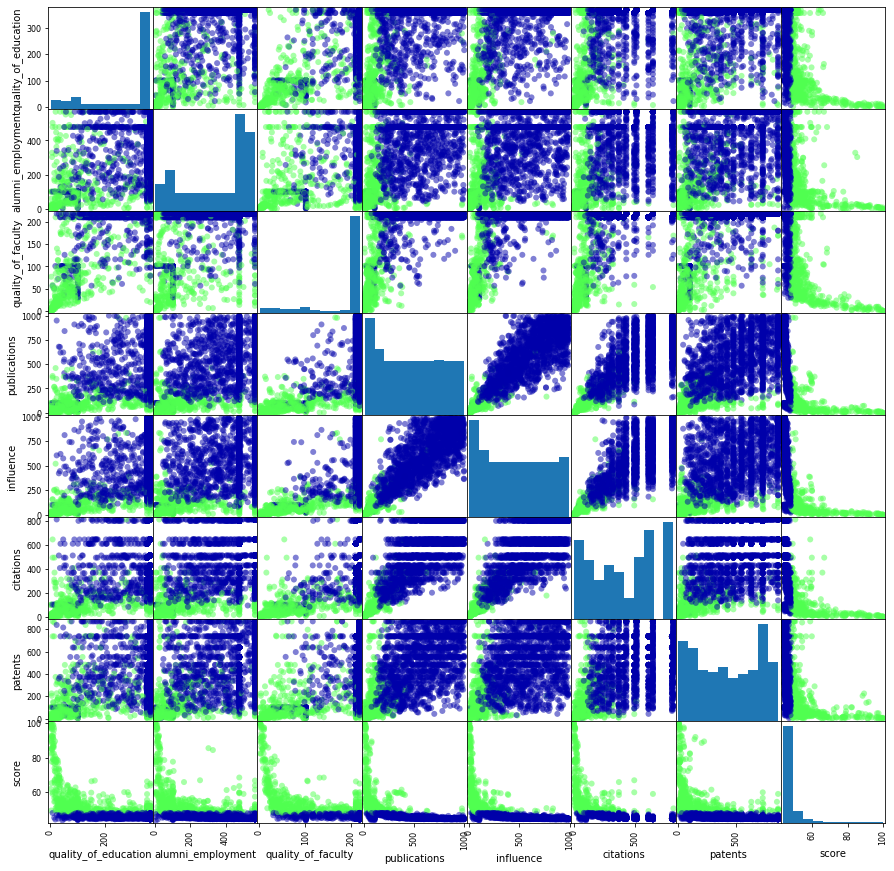

In [24]:
#산점도 행렬
%matplotlib inline
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)

In [31]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [32]:
df_samp['class'].value_counts()

1    514
0    514
Name: class, dtype: int64

In [33]:
X=X_samp[train_cols]
y=y_samp['class']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10,
                                              stratify=y)

In [ ]:
# print(len(y_test))
# a=0
# b=0
# for i in y_test:
#     if i ==0:
#         a+=1
#     else:
#         b+=1
        
# print(a,b)

[0.9563106796116505, 0.9271844660194175, 0.9466019417475728, 0.941747572815534, 0.9611650485436893, 0.9514563106796117, 0.9660194174757282, 0.9563106796116505, 0.9563106796116505, 0.9660194174757282]
최대값: 0.9660194174757282
(array([6, 9], dtype=int64),)
최적의 k: 7 0.9660194174757282


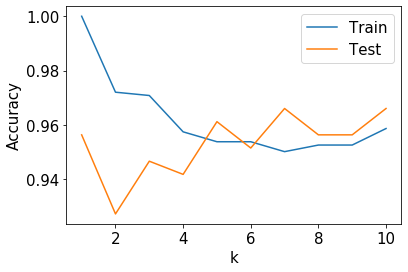

In [35]:
#최적 이웃의 갯수(k)를 구하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11)
for n in neighbors: 
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train,y_train) #기계학습
    # 학습용, 검증용 정확도 점수를 리스트에 추가
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))
    
plt.rcParams['font.size']=15 #그래프의 사이즈 설정
plt.plot(neighbors,train_rate,label='Train') #학습용 정확도 그래프
plt.plot(neighbors,test_rate,label='Test') #검증용 정확도 그래프
plt.ylabel('Accuracy') #x축의 라벨
plt.xlabel('k') #y축의 라벨
plt.legend() #범례표시



print(test_rate)
max_rate=max(test_rate) #검증용 정확도 최대값
print('최대값:',max_rate)
print(np.where(test_rate == max_rate))
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스 위치
print('최적의 k:',idx+1, test_rate[idx])

In [36]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
#모형의 예측 정확도
print('학습용:{:7.2f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:7.2f}%'.format(model.score(X_test,y_test)*100))

학습용:  95.38%
검증용:  96.12%


In [38]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['0','1'],
                  columns=['0','1'])
df_cm

,0,1
0,98,3
1,5,100
